# Interpolation

In this workshop we will learn how to use interpolation to efficiently sample data from the environment.

## 0. Initialization

### 0.1.Importing all necessary libraries and specifying the inputs

In [1]:
import os
import topogenesis as tg
import pyvista as pv
import numpy as np
from scipy.interpolate import RegularGridInterpolator

### 0.2. Load the high resolution envelope lattice

In [2]:
# loading the lattice from csv
lattice_path = os.path.relpath('../data/dynamic output/voxelized_envelope_highres.csv')
env_lattice = tg.lattice_from_csv(lattice_path)
print(env_lattice.shape)

(43, 40, 11)


### 0.3. Load low resolution sun access lattice

In [3]:
# loading the lattice from csv
lattice_path = os.path.relpath('../data/dynamic output/sun_blockage_lowres.csv')
low_sunacc_lattice = tg.lattice_from_csv(lattice_path)
print(low_sunacc_lattice.shape)

(18, 17, 5)


## 1. Interpolation

### 1.1. Interpolating the low-res sun acc to create the high-res sun access lattice

In [4]:
# line spaces
x_space = np.linspace(low_sunacc_lattice.minbound[0], low_sunacc_lattice.maxbound[0],low_sunacc_lattice.shape[0])
y_space = np.linspace(low_sunacc_lattice.minbound[1], low_sunacc_lattice.maxbound[1],low_sunacc_lattice.shape[1])
z_space = np.linspace(low_sunacc_lattice.minbound[2], low_sunacc_lattice.maxbound[2],low_sunacc_lattice.shape[2])

# interpolation function
interpolating_function = RegularGridInterpolator((x_space, y_space, z_space), low_sunacc_lattice, bounds_error=False, fill_value=None)

# high_res lattice
full_lattice = env_lattice + 1

# sample points
sample_points = full_lattice.centroids

# interpolation
interpolated_values = interpolating_function(sample_points)

# lattice construction
sunacc_lattice = tg.to_lattice(interpolated_values.reshape(env_lattice.shape), env_lattice)

# nulling the unavailable cells
sunacc_lattice *= env_lattice

print(sunacc_lattice.shape)

(43, 40, 11)


### 1.2. Visualize the high resolution interpolation of sun access

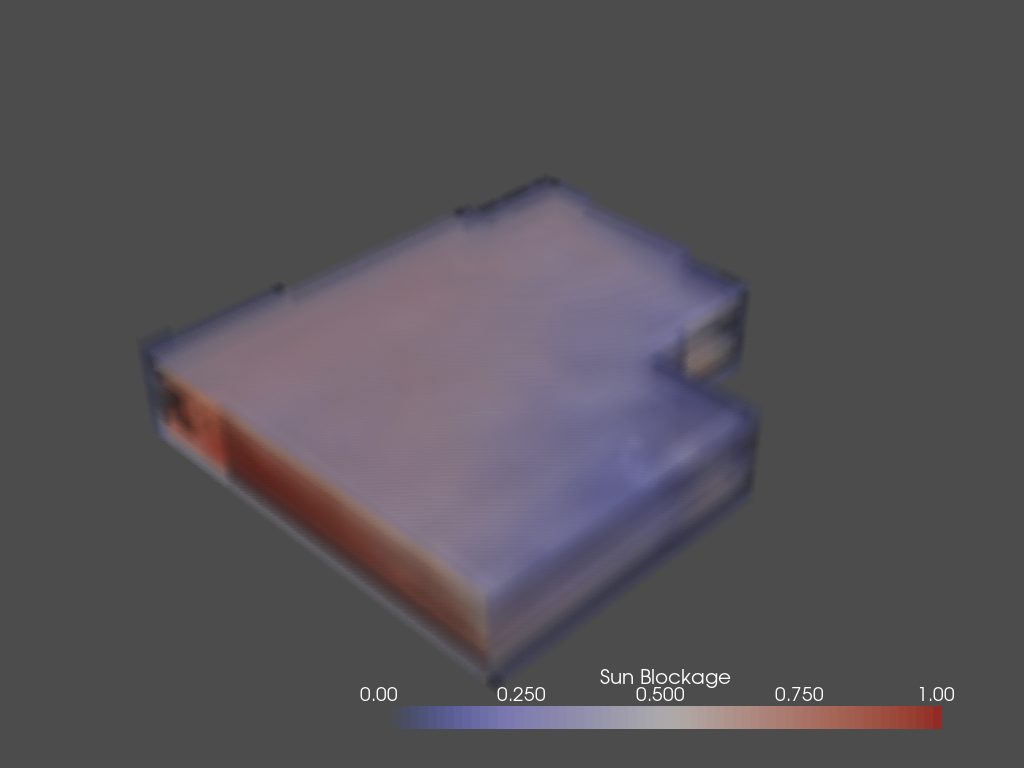

[(269.61191187360555, 188.61191187360552, 251.61191187360552),
 (36.000000000000014, -45.0, 18.0),
 (0.0, 0.0, 1.0)]

In [9]:
# convert mesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

# initiating the plotter
p = pv.Plotter(notebook=True)

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values
grid.dimensions = sunacc_lattice.shape
# The bottom left corner of the data set
grid.origin = sunacc_lattice.minbound
# These are the cell sizes along each axis
grid.spacing = sunacc_lattice.unit

# Add the data values to the cell data
grid.point_arrays["Sun Blockage"] = sunacc_lattice.flatten(order="F")  # Flatten the Lattice

# adding the meshes
# p.add_mesh(tri_to_pv(context_mesh), opacity=0.1, style='wireframe')
    
# adding the volume
opacity = np.array([0,0.6,0.6,0.6,0.6,0.6,0.6])
p.add_volume(grid, cmap="coolwarm", clim=[0, 1.0],opacity=opacity, shade=True)

# plotting
p.show()

### 1.3. Save the high resolution Sun Access Lattice into a CSV

In [6]:
# save the sun access latice to csv
csv_path = os.path.relpath('../data/dynamic output/sun_blockage.csv')
sunacc_lattice.to_csv(csv_path)

### Credits

In [7]:
__author__ = "Shervin Azadi and Pirouz Nourian"
__license__ = "MIT"
__version__ = "1.0"
__url__ = "https://github.com/shervinazadi/spatial_computing_workshops"
__summary__ = "Spatial Computing Design Studio Workshop on Solar Envelope"